### Random Forest Classifier 

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('numerical_chestxray_values.xlsx', sheet_name='Sheet1')

X=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# You can specify various hyperparameters like the number of trees, maximum depth, etc.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)



In [3]:

# for n_estimators in [50, 100, 200]:
#     rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
#     rf_classifier.fit(X_train, y_train)
#     y_pred = rf_classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f'n_estimators={n_estimators} => Accuracy: {accuracy:.2f}')



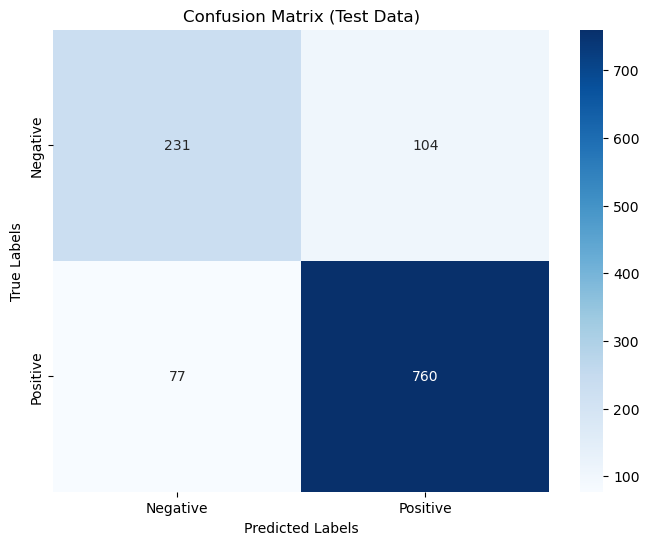

Accuracy: 0.8455631399317406
Precision: 0.8796296296296297
Recall: 0.9080047789725209
F1-Score: 0.8935920047031158
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       335
           1       0.88      0.91      0.89       837

    accuracy                           0.85      1172
   macro avg       0.81      0.80      0.81      1172
weighted avg       0.84      0.85      0.84      1172



In [4]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns


# Calculate metrics
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FN = np.sum((y_test == 1) & (y_pred == 0))

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

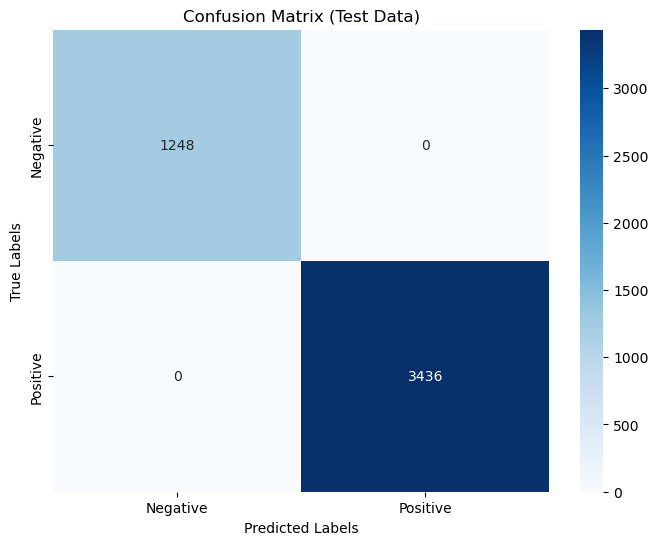

Accuracy: 0.8455631399317406
Precision: 0.8796296296296297
Recall: 0.9080047789725209
F1-Score: 0.8935920047031158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1248
           1       1.00      1.00      1.00      3436

    accuracy                           1.00      4684
   macro avg       1.00      1.00      1.00      4684
weighted avg       1.00      1.00      1.00      4684



In [6]:
y_train_pred = rf_classifier.predict(X_train)

import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns


# Calculate metrics
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FN = np.sum((y_test == 1) & (y_pred == 0))

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the confusion matrix
conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Print classification report
print("Classification Report:\n", classification_report(y_train, y_train_pred))